In [31]:
import pandas as pd
import numpy as np
import os 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime
import seaborn as sns 
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from itertools import product
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('D:\\Modules\\4. DBA 5102 - Business Analytics Capstone - Every Thu\\Bitcoin Price Prediction\\Dataset\\aggregated_df1D_V2.csv')
df.describe(include= 'all')

,Date,open_x,high_x,low_x,close_x,Basis_x,Upper_x,Lower_x,Volume_x,RSI_x,MACD_x,OnBalanceVolume_x,btc_dom,eth_dom,crypto_cap,crypto_cap_exc_BTC,btc_reward
count,2872,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000,2.872000e+03,2872.000000,2872.000000,2.872000e+03,2872.000000,2872.000000,2.872000e+03,2.872000e+03,2.872000e+03
unique,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,16-05-2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,6868.745394,7091.064363,6618.554251,6882.335513,6698.110072,7657.116778,5739.103365,1.566142e+07,22.701452,93.658760,5.302886e+07,29.118637,6.610721,2.549952e+11,1.167079e+11,1.011724e+07
std,NaN,8634.236599,8912.946390,8297.263562,8644.465615,8417.559394,9649.303928,7264.858274,4.387504e+07,12.472643,574.749076,3.905173e+08,29.485023,7.165247,4.652286e+11,2.350231e+11,1.402866e+07
min,NaN,224.552500,234.375000,219.096875,224.741875,0.000000,0.000000,0.000000,3.240388e+01,0.000000,-3638.741814,-2.119188e+09,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,2162.646250,2211.298125,2104.974375,2163.304375,2129.279656,2363.453344,1841.156168,6.140428e+03,12.583698,-64.933867,-1.901783e+05,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,NaN,3758.854063,3842.885625,3659.196044,3758.028110,3695.144991,4240.264242,3252.608137,2.592540e+04,18.709776,11.201258,7.716277e+04,38.744822,7.467392,1.065000e+11,4.646101e+10,5.975299e+06
75%,NaN,6810.951094,7117.937813,6547.025000,6846.133125,6581.877914,7606.335825,5986.441365,3.713586e+06,31.744673,168.148273,5.924994e+05,59.145055,11.758577,2.672500e+11,1.050000e+11,1.546569e+07


In [4]:
df = df.set_index('Date')

In [5]:
df

,open_x,high_x,low_x,close_x,Basis_x,Upper_x,Lower_x,Volume_x,RSI_x,MACD_x,OnBalanceVolume_x,btc_dom,eth_dom,crypto_cap,crypto_cap_exc_BTC,btc_reward
Date,,,,,,,,,,,,,,,,
20-09-2017,244.377500,252.880000,238.750000,243.750000,258.537375,306.855002,210.219748,4.505844e+01,2.866336,-8.376372,-4.476274e+01,53.467687,22.250182,1.200000e+11,5.602387e+10,6.356831e+06
21-09-2017,243.124375,244.375000,222.937500,225.624375,254.709500,300.662380,208.756620,6.260338e+01,2.542571,-9.407429,-1.073661e+02,53.819253,22.246486,1.150000e+11,5.322279e+10,8.287404e+06
22-09-2017,224.552500,234.375000,219.096875,224.741875,251.971156,298.212742,205.729571,5.243540e+01,2.527601,-10.178430,-1.598015e+02,53.986061,22.207990,1.110000e+11,5.111403e+10,6.520223e+06
23-09-2017,224.742500,238.574375,221.431875,236.250000,249.692781,294.288637,205.096925,4.704955e+01,2.811877,-9.748470,-1.127520e+02,53.685770,22.732307,1.140000e+11,5.293661e+10,8.189263e+06
24-09-2017,236.221250,236.874375,226.422500,228.751250,248.317500,293.708213,202.926787,4.135227e+01,2.668853,-9.898704,-1.541043e+02,53.287212,23.231449,1.160000e+11,5.416141e+10,6.815446e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10-09-2021,34794.605000,35274.556250,33095.286880,33637.331250,36359.114030,39154.185830,33564.042230,1.561795e+08,32.291804,416.389221,-9.292162e+08,40.970486,18.594450,2.090000e+12,1.240000e+12,3.976119e+07
10-09-2021,11355.177500,11458.950000,11033.737500,11394.000000,12054.255750,12879.330180,11229.181320,3.325564e+03,11.303525,100.539180,4.792240e+05,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
11-09-2021,33636.439380,34488.075000,33546.377500,33876.577500,36206.328220,39187.257190,33225.399250,1.002900e+08,33.085002,226.178596,-8.289261e+08,40.884951,18.366424,2.070000e+12,1.220000e+12,4.245540e+07


In [6]:
df_plot = df.iloc[:,0:7]

In [7]:
df_plot

,open_x,high_x,low_x,close_x,Basis_x,Upper_x,Lower_x
Date,,,,,,,
20-09-2017,244.377500,252.880000,238.750000,243.750000,258.537375,306.855002,210.219748
21-09-2017,243.124375,244.375000,222.937500,225.624375,254.709500,300.662380,208.756620
22-09-2017,224.552500,234.375000,219.096875,224.741875,251.971156,298.212742,205.729571
23-09-2017,224.742500,238.574375,221.431875,236.250000,249.692781,294.288637,205.096925
24-09-2017,236.221250,236.874375,226.422500,228.751250,248.317500,293.708213,202.926787
...,...,...,...,...,...,...,...
10-09-2021,34794.605000,35274.556250,33095.286880,33637.331250,36359.114030,39154.185830,33564.042230
10-09-2021,11355.177500,11458.950000,11033.737500,11394.000000,12054.255750,12879.330180,11229.181320
11-09-2021,33636.439380,34488.075000,33546.377500,33876.577500,36206.328220,39187.257190,33225.399250


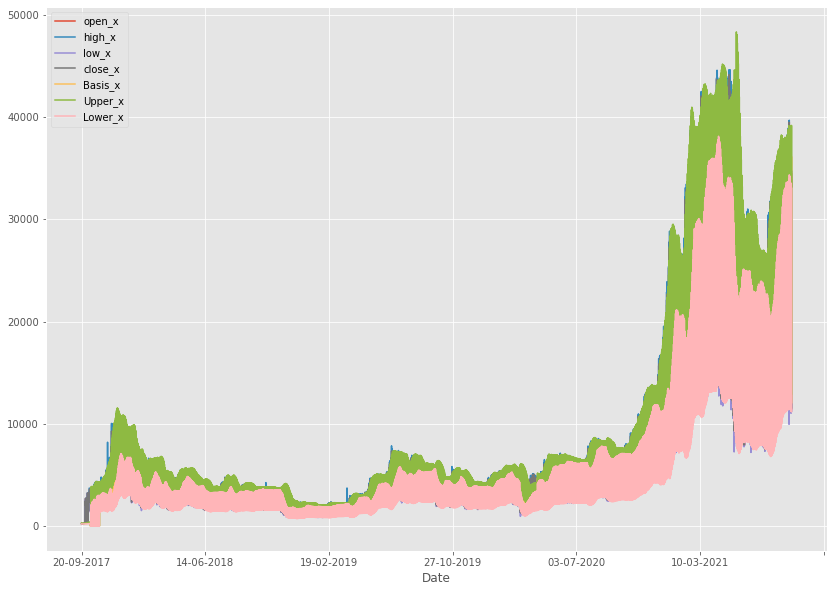

In [8]:
df_plot.loc[:,df_plot.columns].plot(figsize=(14,10));

In [10]:
df

,open_x,high_x,low_x,close_x,Basis_x,Upper_x,Lower_x,Volume_x,RSI_x,MACD_x,OnBalanceVolume_x,btc_dom,eth_dom,crypto_cap,crypto_cap_exc_BTC,btc_reward
Date,,,,,,,,,,,,,,,,
20-09-2017,244.377500,252.880000,238.750000,243.750000,258.537375,306.855002,210.219748,4.505844e+01,2.866336,-8.376372,-4.476274e+01,53.467687,22.250182,1.200000e+11,5.602387e+10,6.356831e+06
21-09-2017,243.124375,244.375000,222.937500,225.624375,254.709500,300.662380,208.756620,6.260338e+01,2.542571,-9.407429,-1.073661e+02,53.819253,22.246486,1.150000e+11,5.322279e+10,8.287404e+06
22-09-2017,224.552500,234.375000,219.096875,224.741875,251.971156,298.212742,205.729571,5.243540e+01,2.527601,-10.178430,-1.598015e+02,53.986061,22.207990,1.110000e+11,5.111403e+10,6.520223e+06
23-09-2017,224.742500,238.574375,221.431875,236.250000,249.692781,294.288637,205.096925,4.704955e+01,2.811877,-9.748470,-1.127520e+02,53.685770,22.732307,1.140000e+11,5.293661e+10,8.189263e+06
24-09-2017,236.221250,236.874375,226.422500,228.751250,248.317500,293.708213,202.926787,4.135227e+01,2.668853,-9.898704,-1.541043e+02,53.287212,23.231449,1.160000e+11,5.416141e+10,6.815446e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10-09-2021,34794.605000,35274.556250,33095.286880,33637.331250,36359.114030,39154.185830,33564.042230,1.561795e+08,32.291804,416.389221,-9.292162e+08,40.970486,18.594450,2.090000e+12,1.240000e+12,3.976119e+07
10-09-2021,11355.177500,11458.950000,11033.737500,11394.000000,12054.255750,12879.330180,11229.181320,3.325564e+03,11.303525,100.539180,4.792240e+05,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
11-09-2021,33636.439380,34488.075000,33546.377500,33876.577500,36206.328220,39187.257190,33225.399250,1.002900e+08,33.085002,226.178596,-8.289261e+08,40.884951,18.366424,2.070000e+12,1.220000e+12,4.245540e+07


In [11]:
df.index = pd.to_datetime(df.index)

In [12]:
# Resampling to daily frequency
df = df.resample('D').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()

In [13]:
df.index

DatetimeIndex(['2017-01-10', '2017-01-11', '2017-01-12', '2017-01-13',
               '2017-01-14', '2017-01-15', '2017-01-16', '2017-01-17',
               '2017-01-18', '2017-01-19',
               ...
               '2021-11-30', '2021-12-01', '2021-12-02', '2021-12-03',
               '2021-12-04', '2021-12-05', '2021-12-06', '2021-12-07',
               '2021-12-08', '2021-12-09'],
              dtype='datetime64[ns]', name='Date', length=1795, freq='D')

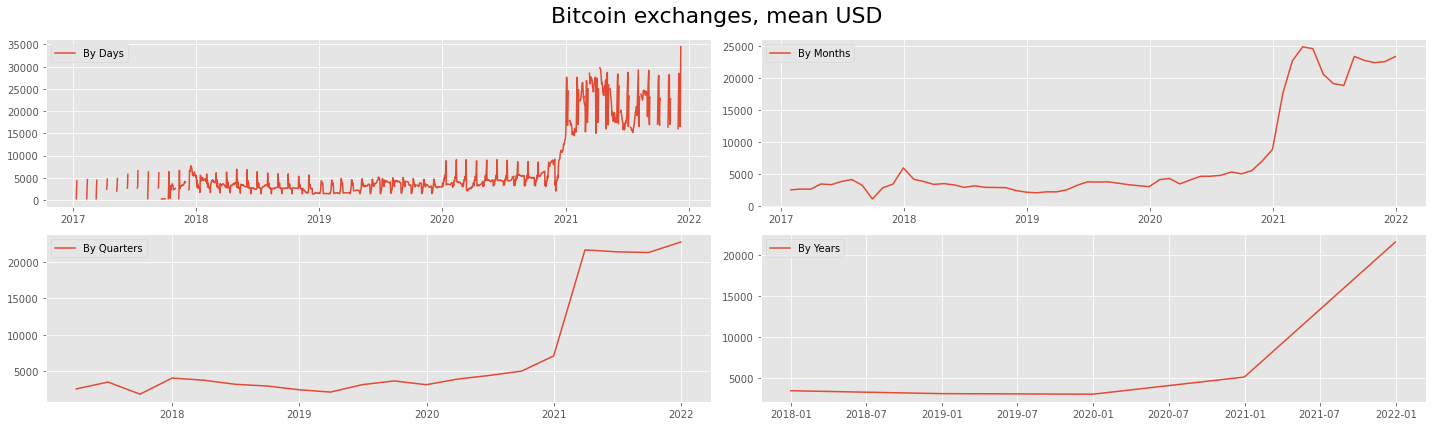

In [14]:
# PLOTS
fig = plt.figure(figsize=[20,6])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(df.close_x, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.close_x, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.close_x, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.close_x, '-', label='By Years')
plt.legend()

plt.tight_layout()
plt.show()

Dickey–Fuller test: p=0.982575


<Figure size 1440x720 with 0 Axes>

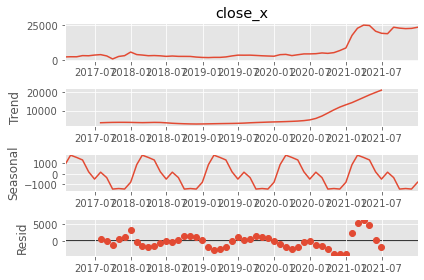

In [15]:
# Checking Stationarity 

plt.figure(figsize=[20,10])
sm.tsa.seasonal_decompose(df_month.close_x).plot();
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.close_x)[1])
plt.show()


From the p-value of Dickey-Fuller test, we conclude that the series is not stationary.

Dickey–Fuller test: p=0.869923


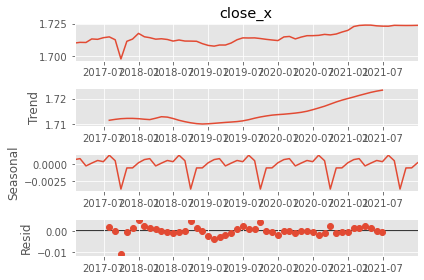

In [16]:
# Box-Cox Transformations

df_month['close_x'], lmbda = stats.boxcox(df_month.close_x)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.close_x)[1])
sm.tsa.seasonal_decompose(df_month.close_x).plot();

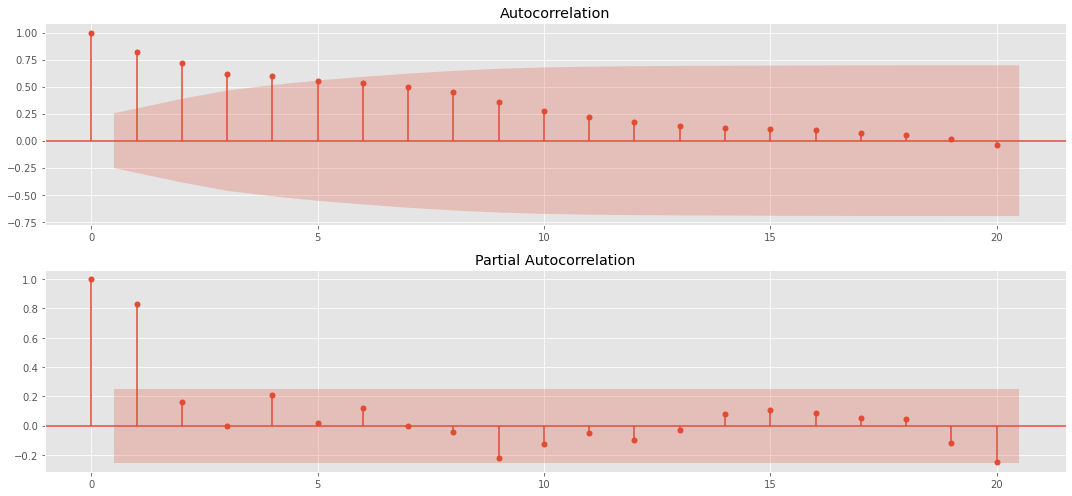

In [26]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots

plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_month.close_x, lags=20, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_month.close_x, lags=20, ax=ax)
plt.tight_layout()
plt.show()

In [32]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

54

In [38]:
# Model Selection

results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_month.close_x, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [39]:
results

[[(0, 0, 0, 0), -398.27339162469326],
 [(0, 0, 0, 1), -396.2733160715951],
 [(0, 0, 1, 0), -396.50993915806924],
 [(0, 0, 1, 1), -393.99254479657463],
 [(0, 0, 2, 0), -394.80850409653056],
 [(0, 0, 2, 1), -385.59896135241445],
 [(0, 1, 0, 0), -397.696770812807],
 [(0, 1, 0, 1), -395.69655790607135],
 [(0, 1, 1, 0), -396.0610049807441],
 [(0, 1, 1, 1), -394.0880365196863],
 [(0, 1, 2, 0), -394.91459617379434],
 [(0, 1, 2, 1), -386.8893557150502],
 [(0, 2, 0, 0), -396.25453501102913],
 [(0, 2, 0, 1), -394.25450552610954],
 [(0, 2, 1, 0), -394.68422169647977],
 [(0, 2, 1, 1), -392.97559560199454],
 [(0, 2, 2, 0), -393.81572921164513],
 [(0, 2, 2, 1), -386.44589494962156],
 [(1, 0, 0, 0), -397.5628143297976],
 [(1, 0, 0, 1), -395.5622267086759],
 [(1, 0, 1, 0), -395.90595071326265],
 [(1, 0, 1, 1), -393.8411697369563],
 [(1, 0, 2, 0), -394.6724296581397],
 [(1, 0, 2, 1), -386.4688084415799],
 [(1, 1, 0, 0), -395.71967681616235],
 [(1, 1, 0, 1), -393.7196522611716],
 [(1, 1, 1, 0), -394.084

In [40]:
# Best Models

result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
0   (0, 0, 0, 0) -398.273392
6   (0, 1, 0, 0) -397.696771
18  (1, 0, 0, 0) -397.562814
2   (0, 0, 1, 0) -396.509939
1   (0, 0, 0, 1) -396.273316
                                     SARIMAX Results                                      
Dep. Variable:                            close_x   No. Observations:                   60
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                 200.137
Date:                            Sun, 19 Sep 2021   AIC                           -398.273
Time:                                    23:27:01   BIC                           -396.423
Sample:                                01-31-2017   HQIC                          -397.577
                                     - 12-31-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------

Dickey–Fuller test:: p=0.000002


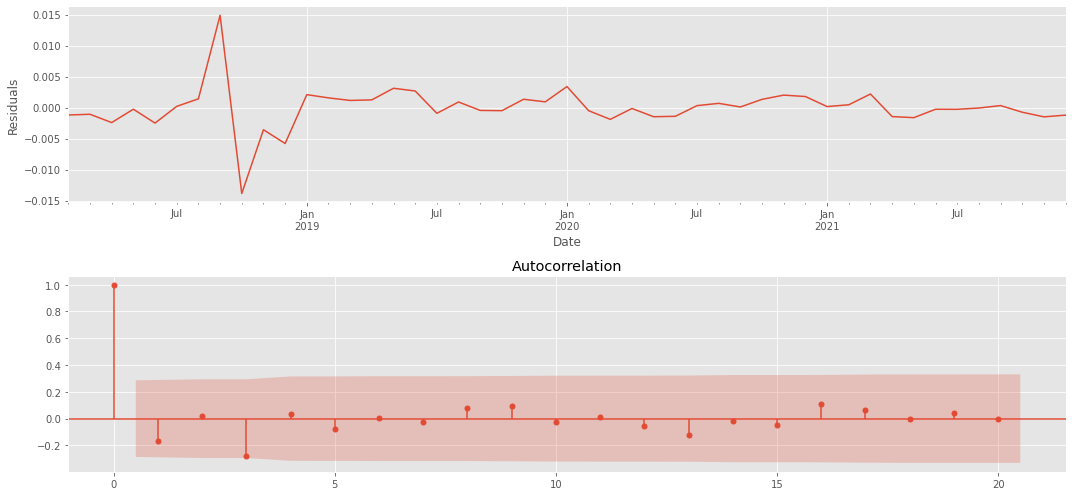

In [41]:
# STL-decomposition

plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=20, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid)[1])

plt.tight_layout()
plt.show()

In [42]:
# Inverse Box-Cox Transformation Function

def invboxcox(y,lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

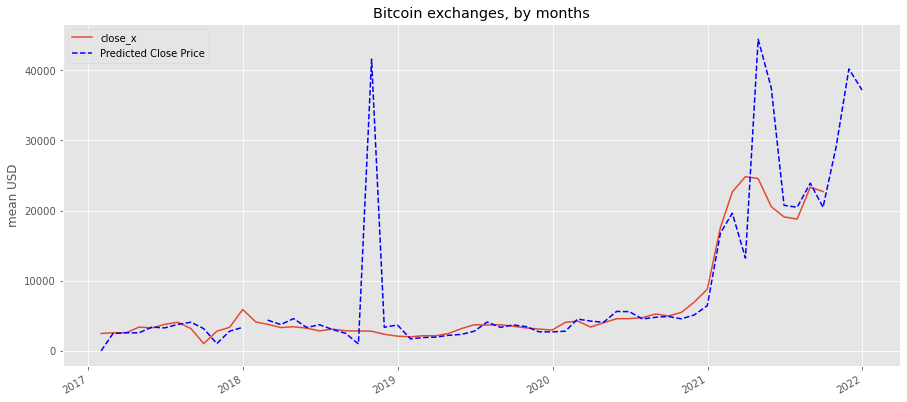

In [50]:
# Prediction

df_month2 = df_month[['close_x']]
df_month2.close_x = df_month2.close_x.apply(lambda x: invboxcox(x, lmbda))
date_list = [datetime(2021, 9, 30), datetime(2021, 10, 31), datetime(2021, 11, 30), datetime(2021, 12, 31)]
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=75), lmbda)
plt.figure(figsize=(15,7))
df_month2.close_x.plot()
df_month2.forecast.plot(color='b', ls='--', label='Predicted Close Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()
